# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**The answers to questions 1-6 are all attached in an image under the Linear Models Github Repo**








**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**1. Load cars csv and clean the data**

In [1]:
#Import Pandas, Seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/annieedmonds/linear_models_assignment/refs/heads/main/data/cars_hw.csv'
df_cars = pd.read_csv(url)
df_cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [3]:
#Clean the data
#Look at variables to see if any are badly scaled
print(df_cars.describe())
print(df_cars.info())
print(df_cars.dtypes)

#Changed Unamed:0 to index
df_cars = df_cars.rename(columns={'Unnamed: 0': 'index'})

#Log transformation for Mileage_Run to better scale the variable
df_cars['Mileage_Run'] = np.log(df_cars['Mileage_Run'])

#Log transformation for Price to better scale the variable
df_cars['Price'] = np.log(df_cars['Price'])

#View data
df_cars.head()

       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year

,index,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,10.705736,1st,5,diesel,7-Speed,Automatic,13.395439
1,2,Hyundai,2016,red,crossover,9.918622,1st,5,petrol,5-Speed,Manual,13.432785
2,3,Honda,2019,white,suv,10.293501,2nd,5,petrol,5-Speed,Manual,13.583579
3,4,Renault,2017,bronze,hatchback,10.482346,1st,5,petrol,5-Speed,Manual,12.933621
4,5,Hyundai,2017,orange,hatchback,10.131658,1st,5,petrol,5-Speed,Manual,13.151922


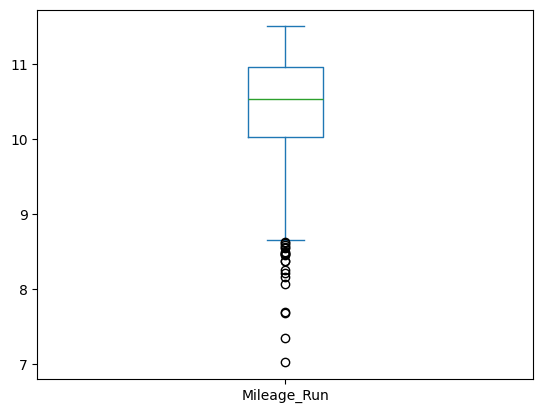

In [4]:
#Drop outliers for Mileage_Run
df_cars['Mileage_Run'].plot.box()
  #There are outliers below 8.5
df_cars = df_cars.loc[df_cars['Mileage_Run'] > 8, :]

**2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?**

In [6]:
#Summarize the Price variable
df_cars['Price'].describe()

,Price
count,972.000000
mean,13.411388
std,0.450755
min,12.144197
25%,13.072647
50%,13.409795
75%,13.691080
max,14.894260


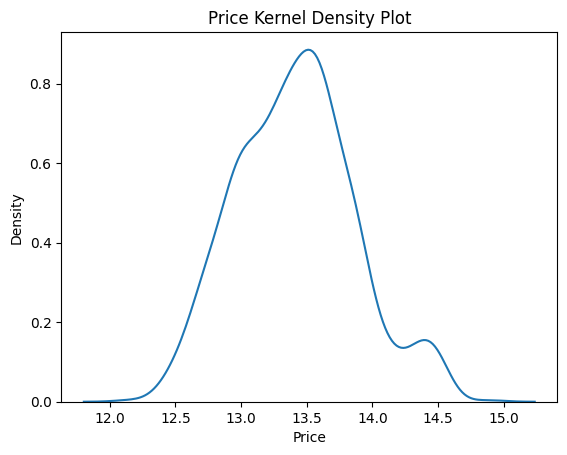

In [7]:
#Create a Kernel Density Plot
var = 'Price'
fig = sns.kdeplot(df_cars[var])
fig.set(title = 'Price Kernel Density Plot', xlabel = 'Price', ylabel = 'Density')
plt.show()

In [8]:
#Use .groupby() and .describe() to summarize prices by brand (Make)
print(df_cars.groupby('Make')['Price'].describe())


               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        304.0  13.368167  0.399394  12.421184  13.091388  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898953  0.159906  13.587354  13.851808  13.905680   
Maruti Suzuki  291.0  13.219308  0.372324  12.375815  12.925130  13.176852   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

[Text(0.5, 1.0, 'Price Kernel Density Plot by Make'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Density')]

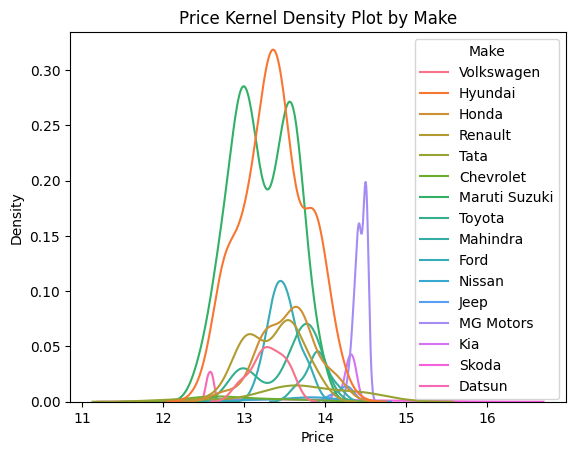

In [9]:
#Grouped kernel density plot by Make
conditioning = 'Make'
var = 'Price'
sns.kdeplot(data = df_cars, x = var, hue = conditioning).set(title = 'Price Kernel Density Plot by Make', xlabel = 'Price', ylabel = 'Density')

In [10]:
#What are the most expensive car brands?
df_cars.groupby('Make')['Price'].mean().sort_values(ascending = False)

,Price
Make,
MG Motors,14.439052
Kia,14.292177
Jeep,14.216591
Mahindra,13.898953
Tata,13.712554
Nissan,13.641194
Skoda,13.640864
Honda,13.536318
Toyota,13.535507


The most expensive car brands  are MG Motors, Kias, and Jeeps. Prices in general have fairly similar average prices, ranging from around 12.5-14.5. This can be seen in both the summary of prices by brand and the kernel density plot where the density peaks.

**3. Split the data into an 80% training set and a 20% testing set.**

In [11]:
#Set variables
X = df_cars.drop(columns=['Price', 'index'])
y = df_cars['Price']

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

**4. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?**

In [12]:
# Function to winsorize a variable:
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Winsorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

In [13]:
df_cars.dtypes

,0
index,int64
Make,object
Make_Year,int64
Color,object
Body_Type,object
Mileage_Run,float64
No_of_Owners,object
Seating_Capacity,int64
Fuel_Type,object
Transmission,object


In [14]:
#Winsorize columns
from sklearn.linear_model import LinearRegression
numeric_cols = ['Make_Year', 'Price', 'Mileage_Run', 'Seating_Capacity']
df_cars[numeric_cols] = df_cars[numeric_cols].apply(winsorize)


In [15]:
# Make a model where you regress price on the numeric variables alone
y = df_cars['Price']  # Target variable

# Winsorize using .apply
df_cars.loc[:, ['Make_Year', 'Price', 'Mileage_Run', 'Seating_Capacity']] = df_cars.loc[:, ['Make_Year', 'Price', 'Mileage_Run', 'Seating_Capacity']].apply(winsorize)

# Numeric predictors only
X_num = df_cars.loc[:, ['Make_Year','Mileage_Run', 'Seating_Capacity']]
X_num.head()

# Train-test split
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size = .2, random_state = 65)

# Fit regression
model_num = LinearRegression(fit_intercept=True).fit(X_train_num, y_train_num)

# Predictions
y_train_pred_num = model_num.predict(X_train_num)
y_test_pred_num = model_num.predict(X_test_num)

# What is the 𝑅2 and RMSE on the training set and test set?
from sklearn.metrics import r2_score, mean_squared_error
r2_train_num = r2_score(y_train_num, y_train_pred_num)
r2_test_num = r2_score(y_test_num, y_test_pred_num)
rmse_train_num = np.sqrt(mean_squared_error(y_train_num, y_train_pred_num))
rmse_test_num = np.sqrt(mean_squared_error(y_test_num, y_test_pred_num))

print("Training set: R2 =", r2_train_num, ", RMSE =", rmse_train_num)
print("Test set:     R2 =", r2_test_num, ", RMSE =", rmse_test_num)



Training set: R2 = 0.43153330750588803 , RMSE = 0.3398180732083617
Test set:     R2 = 0.34460879717883586 , RMSE = 0.3605452038058068


In [16]:
#Categorical variables:

# Select only categorical variables
categorical_vars = df_cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']]
X_cat = pd.get_dummies(categorical_vars, drop_first=True)

# Train-test split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.2, random_state=65)

# Fit regression model
model_cat = LinearRegression(fit_intercept=True).fit(X_train_cat, y_train_cat)

# Predictions
y_train_pred_cat = model_cat.predict(X_train_cat)
y_test_pred_cat = model_cat.predict(X_test_cat)

# 𝑅2 and RMSE on the test set
r2_train_cat = r2_score(y_train_cat, y_train_pred_cat)
r2_test_cat = r2_score(y_test_cat, y_test_pred_cat)
rmse_train_cat = np.sqrt(mean_squared_error(y_train_cat, y_train_pred_cat))
rmse_test_cat = np.sqrt(mean_squared_error(y_test_cat, y_test_pred_cat))

print("Training set: R2 =", r2_train_cat, ", RMSE =", rmse_train_cat)
print("Test set:     R2 =", r2_test_cat, ", RMSE =", rmse_test_cat)

Training set: R2 = 0.6892696827396643 , RMSE = 0.2512382591492692
Test set:     R2 = 0.6551916402270673 , RMSE = 0.26151602846350347


Which model performs better on the test set?
The second model performs better on the test set because the R2 is closer to one and the RMSE is less than the first model.

In [17]:
#Make a third model that combines all the regressors from the previous two
# Combine all predictors
X_all = pd.concat([X_num, X_cat], axis=1)

# Train-test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=65)

# Fit regression model
model_all = LinearRegression(fit_intercept=True).fit(X_train_all, y_train_all)

# Predictions
y_train_pred_all = model_all.predict(X_train_all)
y_test_pred_all = model_all.predict(X_test_all)

# 𝑅2 and RMSE on the test set
r2_train_all = r2_score(y_train_all, y_train_pred_all)
r2_test_all = r2_score(y_test_all, y_test_pred_all)
rmse_train_all = np.sqrt(mean_squared_error(y_train_all, y_train_pred_all))
rmse_test_all = np.sqrt(mean_squared_error(y_test_all, y_test_pred_all))

print("Combined model:")
print("Training set: R2 =", r2_train_all, ", RMSE =", rmse_train_all)
print("Test set:     R2 =", r2_test_all, ", RMSE =", rmse_test_all)


Combined model:
Training set: R2 = 0.8321519226464922 , RMSE = 0.18465120524673645
Test set:     R2 = 0.7937024397221129 , RMSE = 0.20228163944582114


Does the joint model perform better or worse, and by how much?

The joint model performs better than the individual numeric only and categorical only models. The test set R2 for the joint model is 0.79, which is much closer to 1 than 0.34 and 0.66. This means that the join model explains much more variance in price than the individual models. Similarly, the RMSE for the joint model is significantly lower than the RMSEs of the individual models: the joint model is 0.185, the categorical is 0.261, and the numeric is 0.360. This means that the root mean squared error is less than the other two models, and the predictions are closer to the actual prices for the joint model.

**5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 4?**

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Decide the maximum degree to try
max_degree = 10

# Loop through degrees
for degree in range(1, max_degree + 1):
    print(f"\n--- Degree {degree} ---")

    # Create polynomial features
    expander = PolynomialFeatures(degree=degree, include_bias=False)

    # Pass the df into the expander
    X_train_poly = expander.fit_transform(X_train_num)
    X_test_poly = expander.transform(X_test_num)  # only transform for test set

    # Fit regression
    model = LinearRegression(fit_intercept=True).fit(X_train_poly, y_train_num)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Compute R2 and RMSE
    r2_train = r2_score(y_train_num, y_train_pred)
    r2_test = r2_score(y_test_num, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_num, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test_num, y_test_pred))

    print("Training set: R2 =", r2_train, ", RMSE =", rmse_train)
    print("Test set:     R2 =", r2_test, ", RMSE =", rmse_test)




--- Degree 1 ---
Training set: R2 = 0.4315333075058886 , RMSE = 0.33981807320836155
Test set:     R2 = 0.3446087971788333 , RMSE = 0.3605452038058075

--- Degree 2 ---
Training set: R2 = 0.44028682307476175 , RMSE = 0.3371915843244633
Test set:     R2 = 0.3407380699361584 , RMSE = 0.3616083227825182

--- Degree 3 ---
Training set: R2 = 0.44551279087787843 , RMSE = 0.33561373606485817
Test set:     R2 = 0.3347732940126842 , RMSE = 0.36324049333147995

--- Degree 4 ---
Training set: R2 = 0.4475178695828391 , RMSE = 0.33500638084262596
Test set:     R2 = 0.33599474170179455 , RMSE = 0.362906860369665

--- Degree 5 ---
Training set: R2 = 0.44752782700336646 , RMSE = 0.33500336190838337
Test set:     R2 = 0.33598913325703106 , RMSE = 0.36290839299215366

--- Degree 6 ---
Training set: R2 = 0.4475377837475437 , RMSE = 0.33500034315199656
Test set:     R2 = 0.3359835303260812 , RMSE = 0.36290992410141676

--- Degree 7 ---
Training set: R2 = 0.447547707077824 , RMSE = 0.3349973344992061
Test 

R2 does decline, but it does not completely go negative in the above 10 test sets. In the above test sets, degree 1 is the best model so far because it has the highest R2 with the lowest RMSE. However, the R2 is much higher for the joint model than it is for the polynomial features model. Furthermore, the RMSE is lower for the joint model as well, so the joint model is a better model than the expanded features model.

**6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.**

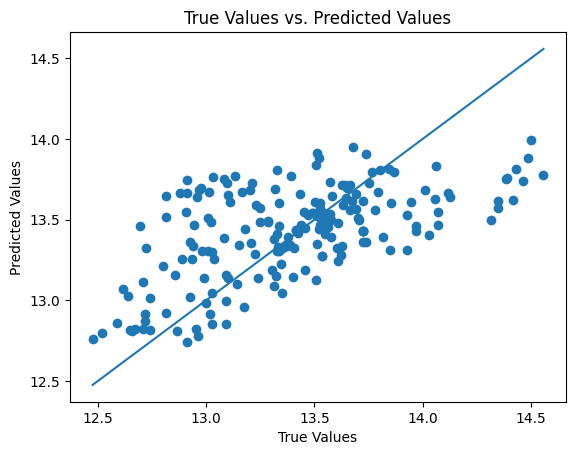

In [26]:
# Create polynomial expander for degree = 1
expander = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = expander.fit_transform(X_train_num)
X_test_poly = expander.transform(X_test_num)

# Fit linear regression
model = LinearRegression().fit(X_train_poly, y_train_num)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

#Plot predicted values for the test data against the true values
plt.scatter(y_test_num, y_test_pred)
plt.plot([y_test_num.min(), y_test_num.max()],
         [y_test_num.min(), y_test_num.max()])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()
#

The predicted and trye values line up around 13.5 on the diaganol. For the rest of the graph, they are slightly scattered but follow the same general trend

/tmp/ipython-input-1864510580.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


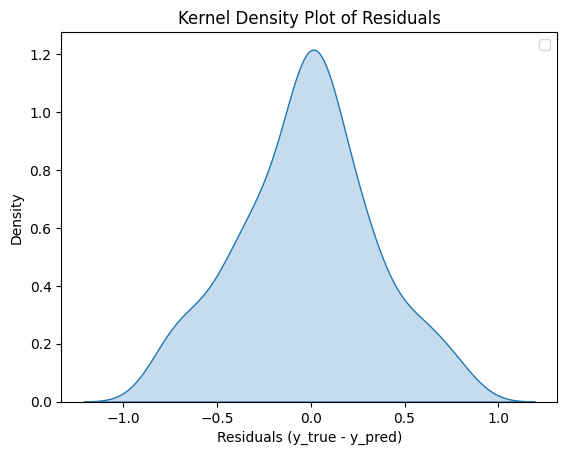

In [28]:
#Compute residuals/errors for the test data
residuals = y_test_num - y_test_pred


#create kernel density plot
sns.kdeplot(residuals, fill=True)
plt.title("Kernel Density Plot of Residuals")
plt.xlabel("Residuals (y_true - y_pred)")
plt.legend()
plt.show()

Yes, the residuals do look roughly bell-shaped around 0, which means that most of the predicted values are close to the true values. This indicates that the model is neither overfitting or underfitting. A weakness of this model is that the R2 is only 0.3446, which is not as close to 1 as would be ideal. Furthermore, the scatterplot of the predicted vs. true values show that they are not exactly the same, and are rather on the same trend or "roughly" the same.